## Importing the required Packages and libraries.

In [ ]:
#!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow-estimator



In [ ]:
#!pip uninstall tensorflow tensorflow-estimator
#!pip install tensorflow


In [ ]:
!pip install tensorflow==2.17.1
!pip install tensorflow-estimator==2.4.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.17.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==2.17.1
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl.metadata (1.2 kB)
Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
ERROR: pip's dependency

In [ ]:
!pip install tensorflow-privacy

  Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.14.1 which is incompatible.


In [ ]:
import os
import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import (
    recall_score,
    f1_score,
    precision_score,
    accuracy_score,
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
     auc,
)

import tensorflow as tf
import tensorflow.compat.v1 as tf1
#import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import TruePositives, TrueNegatives, FalsePositives, FalseNegatives

import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import BatchNormalization






#Filtering errors
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
from google.colab import drive, files
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
data  = pd.read_csv("/content/gdrive/My Drive /data.csv",low_memory=False)
display(data.head(2), data.shape)

,timestamp,src_ip,dst_ip,protocol,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,...,tcp_flag_ns,tcp_flag_cwr,tcp_flag_ecn,tcp_flag_urg,tcp_flag_ack,tcp_flag_push,tcp_flag_reset,tcp_flag_syn,tcp_flag_fin,is_attack
0,"02/14/2020, 11:01:47:599181",1,18,12,26,118,1,0,0,14816,...,0,0,0,0,2,2,0,0,2,0
1,"02/14/2020, 10:53:58:393457",5,18,12,26,118,1,0,0,27432,...,0,0,0,0,2,2,0,0,2,0


(2059162, 22)

In [ ]:
unique_elements = data['is_attack'].unique()
unique_elements

array([0, 1])

In [ ]:
value_counts = data['is_attack'].value_counts()
value_counts

,count
is_attack,
1,1059162
0,1000000


In [ ]:
data.columns

Index(['timestamp', 'src_ip', 'dst_ip', 'protocol', 'ttl', 'ip_len',
       'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb', 'src_port', 'dst_port',
       'tcp_flag_res', 'tcp_flag_ns', 'tcp_flag_cwr', 'tcp_flag_ecn',
       'tcp_flag_urg', 'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset',
       'tcp_flag_syn', 'tcp_flag_fin', 'is_attack'],
      dtype='object')

In [ ]:
data.drop('timestamp', axis=1, inplace=True)

In [ ]:
data.columns

Index(['src_ip', 'dst_ip', 'protocol', 'ttl', 'ip_len', 'ip_flag_df',
       'ip_flag_mf', 'ip_flag_rb', 'src_port', 'dst_port', 'tcp_flag_res',
       'tcp_flag_ns', 'tcp_flag_cwr', 'tcp_flag_ecn', 'tcp_flag_urg',
       'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset', 'tcp_flag_syn',
       'tcp_flag_fin', 'is_attack'],
      dtype='object')

In [ ]:
(data.isnull().sum() / len(data)) * 100

,0
src_ip,0.0
dst_ip,0.0
protocol,0.0
ttl,0.0
ip_len,0.0
ip_flag_df,0.0
ip_flag_mf,0.0
ip_flag_rb,0.0
src_port,0.0
dst_port,0.0


In [ ]:
target_column = 'is_attack'
categorical_columns = [col for col in data.columns if col not in [target_column]]

In [ ]:
# Y = mx +c
# Y is what we are predicting if "is_attack and our x is other columns that we are using to predict is "is_attack"
X = data.drop(target_column, axis=1)

y = data[target_column]


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

In [ ]:
# Standard Scaling
scaler = StandardScaler()

#Perfom feature scaling for the training set
X_train_scaled = X_train.copy()
X_train_scaled[categorical_columns] = scaler.fit_transform(X_train[categorical_columns])

#Perfom feature scaling for the training set
X_valid_scaled = X_valid.copy()
X_valid_scaled[categorical_columns] = scaler.transform(X_valid[categorical_columns])

#Perfom feature scaling for the test set
X_test_scaled = X_test.copy()
X_test_scaled[categorical_columns] = scaler.transform(X_test[categorical_columns])

# Reshape data for LSTM

#I now convert the scaled training set into a NP Arrays and then reshape it

#I reshaped it to be compatible with the expected inputs by LSTM model
X_train_numpy = X_train_scaled[categorical_columns].to_numpy()
X_train_lstm = X_train_numpy.reshape(X_train_numpy.shape[0], 1, X_train_numpy.shape[1])

In [ ]:
# Convert the DataFrame to a NumPy array


#I now convert the scaled validation set into a NP Arrays and then reshape it

#I reshaped it to be compatible with the expected inputs by LSTM model

X_valid_array = X_valid_scaled[categorical_columns].to_numpy()

X_valid_reshaped = X_valid_array.reshape(X_valid_array.shape[0], 1, X_valid_array.shape[1])

#### **Implementing LSTM Model using Stochastic Gradient Descent  Optmizer PATE(Without Differential Privacy.)**

In [ ]:
from keras.callbacks import EarlyStopping
# Early stopping (make patience bigger if stopping too early)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Define the input_shape variable
#input_shape = X_train_lstm.shape[1:]
input_shape=(1, len(categorical_columns))
num_classes = data[target_column].nunique()

def create_teacher_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(units=48, input_shape=input_shape))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=48, activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

def create_student_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(units=48, input_shape=input_shape))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=48, activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model
# Define your hyperparameters
num_teachers = 1
epsilon = 1.0
kfolds = 2
num_epochs = 2
bs = 32

# Perform 5-fold cross-validation
kfold = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=42)  # Set random_state for reproducibility
cv_results = []

for train_index, test_index in kfold.split(X_train_lstm, y_train):
    X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Create and train teacher models for this fold
    teacher_models = []
    for i in range(num_teachers):
        teacher_model = create_teacher_model(input_shape, num_classes)
        teacher_model.fit(X_train_fold, y_train_fold, epochs=num_epochs, batch_size=bs,
                          validation_data= (X_val_fold, y_val_fold),
                          callbacks=[early_stopping])  # Adjust epochs and batch_size as needed
        teacher_models.append(teacher_model)

    # Generate labels for the training data using teacher models
    def generate_labels(data):
        labels = []
        for model in teacher_models:
            labels.append(np.argmax(model.predict(data), axis = 1))
        return np.array(labels)  # Convert list of arrays to a single array

    # Define your student model
    student_model = create_student_model(input_shape, num_classes)

    # Generate labels for the training data using teacher models
    train_labels = generate_labels(X_train_fold)
    # train_labels = train_labels.reshape((-1, num_teachers, num_classes))
    student_y_train_fold = pd.Series(train_labels[0], index = y_train_fold.index)

    # Train the student model using the labels generated by the teacher models
    student_model.fit(X_train_fold, student_y_train_fold, epochs=num_epochs, batch_size=bs, callbacks=[early_stopping])  # Adjust epochs and batch_size as needed

    # Evaluate the student model on the validation set
    val_loss, val_accuracy = student_model.evaluate(X_val_fold, y_val_fold)
    cv_results.append((val_loss, val_accuracy))

# Fit the full model on the entire training set
teacher_models = []
for i in range(num_teachers):
    teacher_model = create_teacher_model(input_shape, num_classes)
    teacher_model.fit(X_train_lstm, y_train, epochs=num_epochs, batch_size=bs, validation_split = 0.2, callbacks=[early_stopping])  # Adjust epochs and batch_size as needed
    teacher_models.append(teacher_model)

# Generate labels for the training data using teacher models
def generate_labels(data):
    labels = []
    for model in teacher_models:
        labels.append(np.argmax(model.predict(data), axis = 1))
    return np.array(labels)  # Convert list of arrays to a single array

# Define your student model
student_model = create_student_model(input_shape, num_classes)

# Generate labels for the training data using teacher models
train_labels = generate_labels(X_train_lstm)
# train_labels = train_labels.reshape((-1, num_teachers, num_classes))
student_train_labels = pd.Series(train_labels[0], index = y_train.index)

# Train the student model using the labels generated by the teacher models
model_history =student_model.fit(X_train_lstm, student_train_labels, epochs=num_epochs, batch_size=bs,validation_split = 0.2, callbacks=[early_stopping])  # Adjust epochs and batch_size as needed


# # Predict on the test data
X_test_array = X_test_scaled[categorical_columns].to_numpy()
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])

# Predict on the test data
y_test_pred = student_model.predict(X_test_reshaped)

Epoch 1/2
24131/24131 [==============================] - 89s 4ms/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 1.6872e-04 - val_accuracy: 1.0000
Epoch 2/2
24131/24131 [==============================] - 35s 1ms/step
Epoch 1/2
24118/24131 [============================>.] - ETA: 0s - loss: 0.0178 - accuracy: 0.9946

24131/24131 [==============================] - 59s 2ms/step - loss: 0.0178 - accuracy: 0.9946
Epoch 2/2
24127/24131 [============================>.] - ETA: 0s - loss: 1.2654e-07 - accuracy: 1.0000

24131/24131 [==============================] - 36s 1ms/step - loss: 7.9066e-04 - accuracy: 1.0000
Epoch 1/2
24131/24131 [==============================] - 91s 4ms/step - loss: 0.0190 - accuracy: 0.9943 - val_loss: 2.9542e-04 - val_accuracy: 1.0000
Epoch 2/2
24131/24131 [==============================] - 34s 1ms/step
Epoch 1/2
24129/24131 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9943

24131/24131 [==============================] - 60s 2ms/step - loss: 0.0185 - accuracy: 0.9943
Epoch 2/2
24125/24131 [============================>.] - ETA: 0s - loss: 2.0673e-07 - accuracy: 1.0000

24131/24131 [==============================] - 36s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 1/2
38610/38610 [==============================] - 108s 3ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 2.3159e-04 - val_accuracy: 0.9999
Epoch 2/2
48262/48262 [==============================] - 68s 1ms/step
Epoch 1/2
38610/38610 [==============================] - 113s 3ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 2.2795e-05 - val_accuracy: 1.0000
Epoch 2/2
6435/6435 [==============================] - 9s 1ms/step


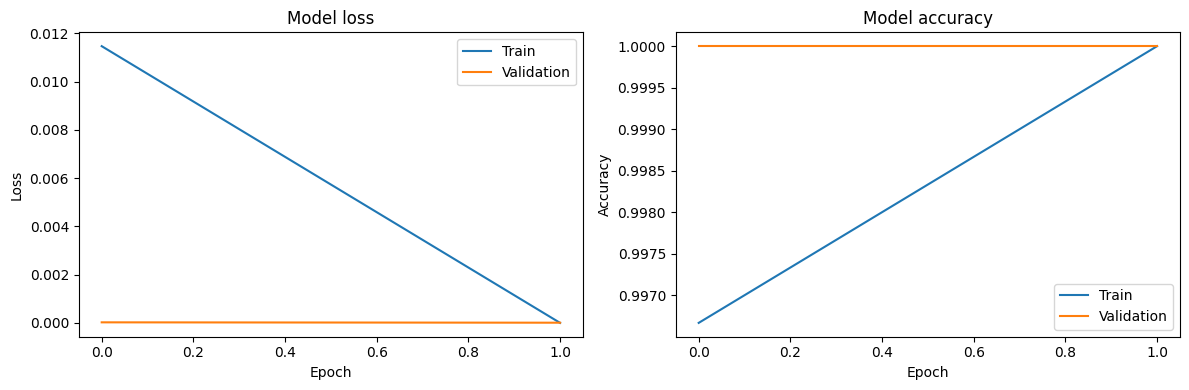

In [ ]:
# Function to plot loss curves
def plot_loss(history1, history2=None):
    plt.figure(figsize=(12, 4))

    # Plot training & validation loss values for the first model
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['loss'])
    plt.plot(history1.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation accuracy values for the first model
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['accuracy'])
    plt.plot(history1.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')

    if history2 is not None:
        # Plot training & validation loss values for the second model
        plt.subplot(1, 2, 1)
        plt.plot(history2.history['loss'], linestyle='dashed')
        plt.plot(history2.history['val_loss'], linestyle='dashed')
        plt.legend(['Train', 'Validation', 'Train Privacy', 'Validation Privacy'], loc='upper right')

        # Plot training & validation accuracy values for the second model
        plt.subplot(1, 2, 2)
        plt.plot(history2.history['accuracy'], linestyle='dashed')
        plt.plot(history2.history['val_accuracy'], linestyle='dashed')
        plt.legend(['Train', 'Validation', 'Train Privacy', 'Validation Privacy'], loc='lower right')

    plt.tight_layout()
    plt.show()

# Plot loss curves
plot_loss(model_history)

In [ ]:
# Convert probability predictions to class labels
y_test_pred_classes_mlp = np.argmax(y_test_pred, axis=1)

# Print the average cross-validation results
print("Average cross-validation loss:", sum(cv_result[0] for cv_result in cv_results) / len(cv_results))
print("Average cross-validation accuracy:", sum(cv_result[1] for cv_result in cv_results) / len(cv_results))

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test, y_test_pred_classes_mlp)
precision_mlp = precision_score(y_test, y_test_pred_classes_mlp, average='macro')
recall_mlp = recall_score(y_test, y_test_pred_classes_mlp, average='macro')
f1_mlp = f1_score(y_test, y_test_pred_classes_mlp, average='macro')

# Print the results for the MLP model
print("MLP Model:")
print(f"Accuracy =  {accuracy_mlp}")
print(f"Precision = {precision_mlp}")
print(f"Recall = {recall_mlp}")
print(f"F1 Score =  {f1_mlp}")

Average cross-validation loss: 0.0010992510942742229
Average cross-validation accuracy: 0.9999592006206512
MLP Model:
Accuracy =  0.9999757183719654
Precision = 0.9999749428697431
Recall = 0.9999764484220443
F1 Score =  0.999975695054611


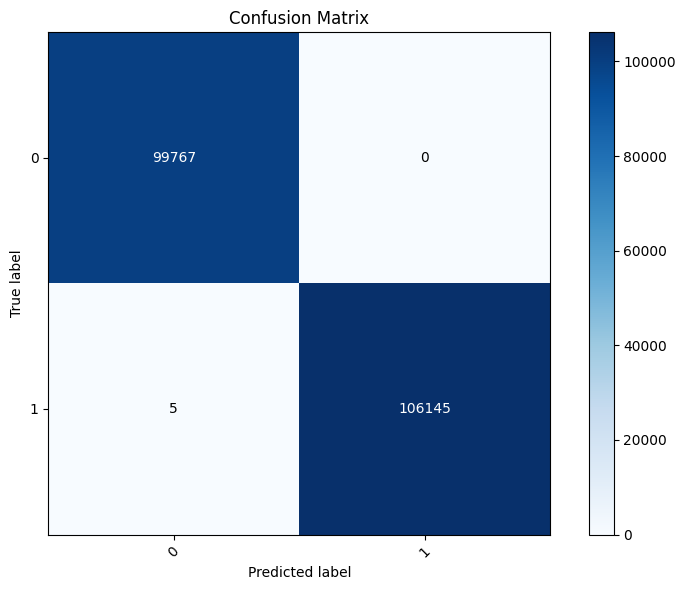

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_classes_mlp)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

num_classes = conf_matrix.shape[0]

# Get class labels from the LabelEncoder
class_labels = [0,1]

plt.xticks(np.arange(num_classes), class_labels, rotation=45)
plt.yticks(np.arange(num_classes), class_labels)

thresh = conf_matrix.max() / 2.

# Add text annotations
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

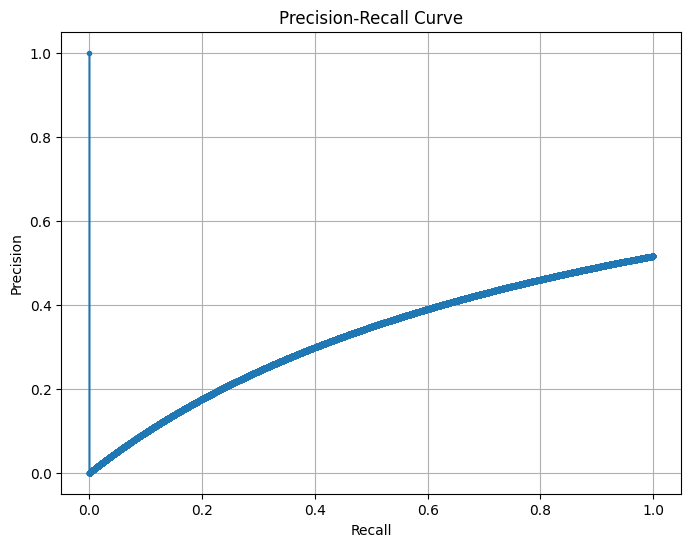

In [ ]:
# Calculate precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred[:,0])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

<ipython-input-24-de4ab9824f8a>:5: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


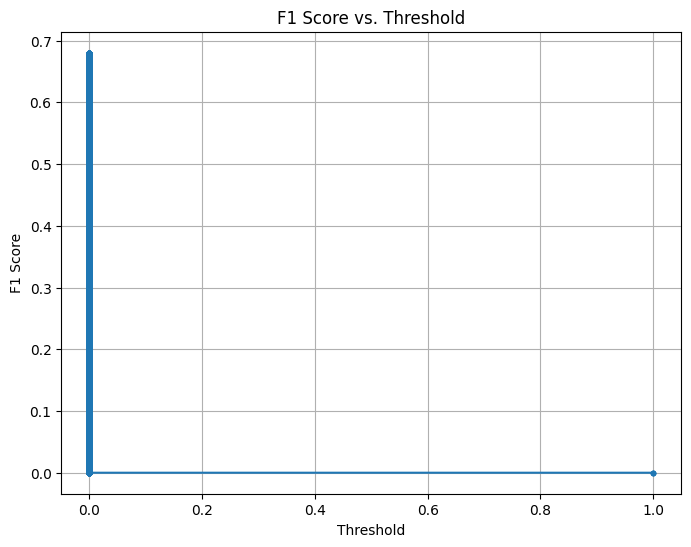

Best Threshold for Max F1 Score: 1.0


In [ ]:
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred[:,0])

# Calculate the F1 score at each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

# Plot the F1 score curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], marker='.')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.grid(True)
plt.show()

print(f"Best Threshold for Max F1 Score: {best_threshold}")


### **Implement LSTM using Stochastic Gradient Descent Optmizer with Differential Privacy PATE.**

- Differential privacy (DP) is a technique that can be used to add noise to data in a way that makes it difficult to identify individuals in the dataset, while still allowing the data to be used to train accurate machine learning models.

In [ ]:
# Define the input_shape variable
#input_shape = X_train_lstm.shape[1:]
input_shape=(1, len(categorical_columns))

def create_teacher_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(units=48, input_shape=input_shape))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=48, activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Set hyperparameters for privacy-preserving training
batch_size = 128  # Number of samples in each training batch
l2_norm_clip = 1.5  # Upper bound on the L2 norm of model's gradients
noise_multiplier = 1.3  # Multiplier for the Gaussian noise added to gradients
num_microbatches = 1  # Number of microbatches for training
learning_rate = 0.003  # Learning rate for the optimizer

# Ensure that batch size is a multiple of the number of microbatches
if batch_size % num_microbatches != 0:
    raise ValueError('Batch size should be an integer multiple of the number of microbatches')

# Initialize a differentially private stochastic gradient descent optimizer
optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate)

def create_student_model_privacy(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(units=48, input_shape=input_shape))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=48, activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model outside the loop if the architecture and optimizer are consistent
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model



# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define your hyperparameters
num_teachers = 1
epsilon = 1.0
kfolds = 2
num_epochs = 2
bs = 32

# Perform 5-fold cross-validation
kfold = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=42)  # Set random_state for reproducibility
cv_results = []

for train_index, test_index in kfold.split(X_train_lstm, y_train):
    X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Create and train teacher models for this fold
    teacher_models = []
    for i in range(num_teachers):
        teacher_model = create_teacher_model(input_shape, num_classes)
        teacher_model.fit(X_train_fold, y_train_fold, epochs=num_epochs, batch_size=bs,
                          validation_data= (X_val_fold, y_val_fold) ,
                          callbacks=[early_stopping])  # Adjust epochs and batch_size as needed
        teacher_models.append(teacher_model)

    # Generate labels for the training data using teacher models
    def generate_labels(data):
        labels = []
        for model in teacher_models:
            labels.append(np.argmax(model.predict(data), axis = 1))
        return np.array(labels)  # Convert list of arrays to a single array

    # Define your student model
    student_model_privacy = create_student_model_privacy(input_shape, num_classes)

    # Generate labels for the training data using teacher models
    train_labels = generate_labels(X_train_fold)
    # train_labels = train_labels.reshape((-1, num_teachers, num_classes))
    student_y_train_fold = pd.Series(train_labels[0], index = y_train_fold.index)

    # Train the student model using the labels generated by the teacher models
    student_model_privacy.fit(X_train_fold, student_y_train_fold, epochs=num_epochs, batch_size=bs,
                              callbacks=[early_stopping])  # Adjust epochs and batch_size as needed

    # Evaluate the student model on the validation set
    val_loss, val_accuracy = student_model.evaluate(X_val_fold, y_val_fold)
    cv_results.append((val_loss, val_accuracy))

# Fit the full model on the entire training set
teacher_models = []
for i in range(num_teachers):
    teacher_model = create_teacher_model(input_shape, num_classes)
    teacher_model.fit(X_train_lstm, y_train, epochs=num_epochs, batch_size=bs,validation_split = 0.2, callbacks=[early_stopping])  # Adjust epochs and batch_size as needed
    teacher_models.append(teacher_model)

# Generate labels for the training data using teacher models
def generate_labels(data):
    labels = []
    for model in teacher_models:
        labels.append(np.argmax(model.predict(data), axis = 1))
    return np.array(labels)  # Convert list of arrays to a single array

# Define your student model
student_model_privacy = create_student_model_privacy(input_shape, num_classes)

# Generate labels for the training data using teacher models
train_labels = generate_labels(X_train_lstm)
# train_labels = train_labels.reshape((-1, num_teachers, num_classes))
student_train_labels = pd.Series(train_labels[0], index = y_train.index)

# Train the student model using the labels generated by the teacher models
model_history_privacy = student_model_privacy.fit(X_train_lstm, student_train_labels, epochs=num_epochs, batch_size=bs,validation_split = 0.2, callbacks=[early_stopping])  # Adjust epochs and batch_size as needed


# # Predict on the test data
X_test_array = X_test_scaled[categorical_columns].to_numpy()


Epoch 1/2
24131/24131 [==============================] - 95s 4ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 1.6603e-04 - val_accuracy: 1.0000
Epoch 2/2
24131/24131 [==============================] - 34s 1ms/step
Epoch 1/2
24123/24131 [============================>.] - ETA: 0s - loss: 0.2859 - accuracy: 0.9191

24131/24131 [==============================] - 72s 3ms/step - loss: 0.2860 - accuracy: 0.9191
Epoch 2/2
24128/24131 [============================>.] - ETA: 0s - loss: 0.6716 - accuracy: 0.9542

24131/24131 [==============================] - 37s 2ms/step - loss: 9.8065e-04 - accuracy: 1.0000
Epoch 1/2
24131/24131 [==============================] - 92s 4ms/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 2.4502e-04 - val_accuracy: 1.0000
Epoch 2/2
24131/24131 [==============================] - 34s 1ms/step
Epoch 1/2
24112/24131 [============================>.] - ETA: 0s - loss: 0.3672 - accuracy: 0.9126

24131/24131 [==============================] - 73s 3ms/step - loss: 0.3672 - accuracy: 0.9126
Epoch 2/2
24131/24131 [==============================] - ETA: 0s - loss: 0.6824 - accuracy: 0.9468

24131/24131 [==============================] - 37s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 1/2
38610/38610 [==============================] - 107s 3ms/step - loss: 0.0108 - accuracy: 0.9968 - val_loss: 1.6363e-04 - val_accuracy: 1.0000
Epoch 2/2
48262/48262 [==============================] - 66s 1ms/step
Epoch 1/2
38610/38610 [==============================] - 123s 3ms/step - loss: 0.5802 - accuracy: 0.9219 - val_loss: 0.3377 - val_accuracy: 0.9813
Epoch 2/2
38610/38610 [==============================] - 112s 3ms/step - loss: 1.1434 - accuracy: 0.9587 - val_loss: 0.6347 - val_accuracy: 0.9823


In [ ]:
# Predict on the test data
y_test_pred_mlp_privacy = student_model_privacy.predict(X_test_reshaped)

# # Apply the threshold to make binary predictions
y_test_pred_binary_mlp_privacy = y_test_pred_mlp_privacy.argmax(axis=1)

6435/6435 [==============================] - 9s 1ms/step


In [ ]:
# Print the average cross-validation results
print("Average cross-validation loss:", sum(cv_result[0] for cv_result in cv_results) / len(cv_results))
print("Average cross-validation accuracy:", sum(cv_result[1] for cv_result in cv_results) / len(cv_results))

# Evaluate the MLP model
accuracy_mlp_privacy = accuracy_score(y_test, y_test_pred_binary_mlp_privacy)
precision_mlp_privacy = precision_score(y_test, y_test_pred_binary_mlp_privacy, average='macro')
recall_mlp_privacy = recall_score(y_test, y_test_pred_binary_mlp_privacy, average='macro')
f1_mlp_privacy = f1_score(y_test, y_test_pred_binary_mlp_privacy, average='macro')

# Print the results for the MLP model
print("MLP Model:")
print(f"Accuracy =  {accuracy_mlp_privacy}")
print(f"Precision = {precision_mlp_privacy}")
print(f"Recall = {recall_mlp_privacy}")
print(f"F1 Score =  {f1_mlp_privacy}")

Average cross-validation loss: 0.0011203816975466907
Average cross-validation accuracy: 0.9999604821205139
MLP Model:
Accuracy =  0.9828426016307541
Precision = 0.9830360321152098
Recall = 0.9826602001504768
F1 Score =  0.9828199077564952


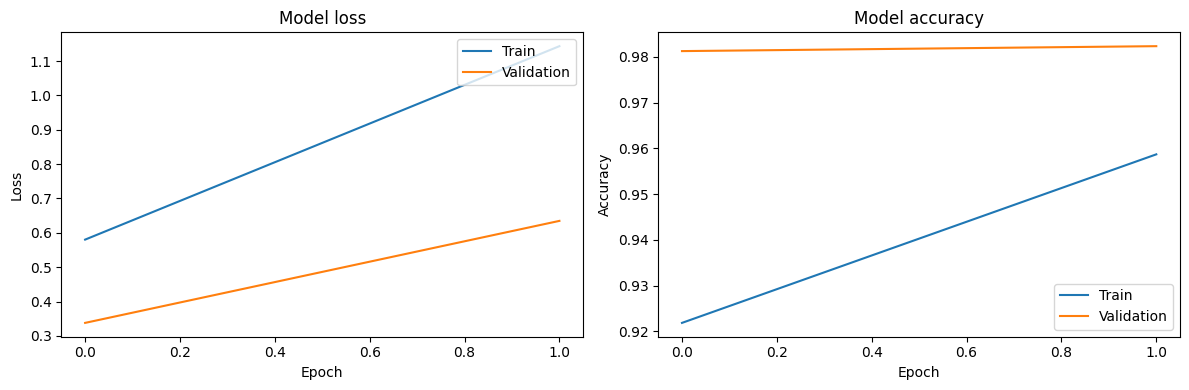

In [ ]:
# Plot loss curves
plot_loss(model_history_privacy)

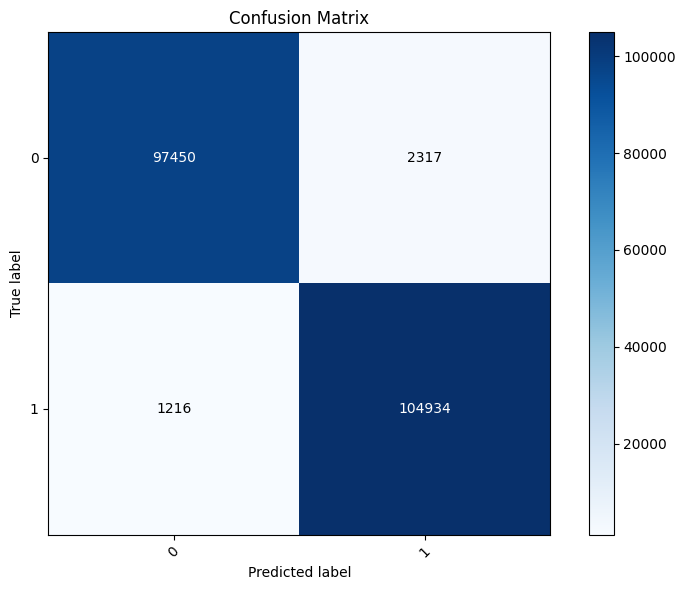

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary_mlp_privacy)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

num_classes = conf_matrix.shape[0]

# Get class labels from the LabelEncoder
class_labels = [0, 1]

plt.xticks(np.arange(num_classes), class_labels, rotation=45)
plt.yticks(np.arange(num_classes), class_labels)

thresh = conf_matrix.max() / 2.

# Add text annotations
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

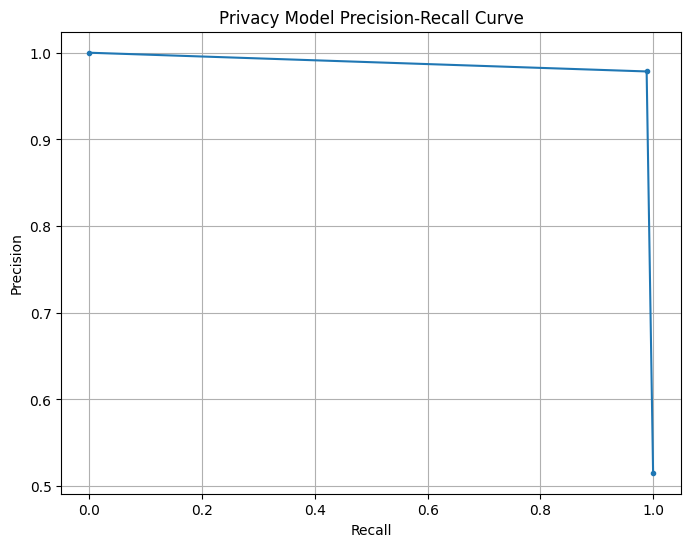

In [ ]:
# Calculate precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_binary_mlp_privacy)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Privacy Model Precision-Recall Curve')
plt.grid(True)
plt.show()

In [ ]:
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test,y_test_pred_binary_mlp_privacy [:,0])

# Calculate the F1 score at each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

# Plot the F1 score curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], marker='.')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('Privacy Model F1 Score vs. Threshold')
plt.grid(True)
plt.show()

print(f"Best Threshold for Max F1 Score: {best_threshold}")


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# Compute privacy budget
privacy_report = compute_dp_sgd_privacy.compute_dp_sgd_privacy_lib.compute_dp_sgd_privacy_statement(
    number_of_examples=len(X_train_lstm),
    batch_size=batch_size,
    noise_multiplier=noise_multiplier,
    num_epochs=30,
    delta=1e-5
)

In [ ]:
print(privacy_report)

DP-SGD performed over 1544371 examples with 128 examples per iteration, noise
multiplier 1.3 for 30 epochs with microbatching, and no bound on number of
examples per user.

This privacy guarantee protects the release of all model checkpoints in addition
to the final model.

Example-level DP with add-or-remove-one adjacency at delta = 1e-05 computed with
RDP accounting:
    Epsilon with each example occurring once per epoch:        74.229
    Epsilon assuming Poisson sampling (*):                      1.495

No user-level privacy guarantee is possible without a bound on the number of
examples per user.

(*) Poisson sampling is not usually done in training pipelines, but assuming
that the data was randomly shuffled, it is believed that the actual epsilon
should be closer to this value than the conservative assumption of an arbitrary
data order.



## Combine

In [ ]:
# Create DataFrame
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Regular': [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp],
    'Privacy': [accuracy_mlp_privacy, precision_mlp_privacy, recall_mlp_privacy, f1_mlp_privacy]
}

df = pd.DataFrame(data)

# Print DataFrame
display(df)

,Metric,Regular,Privacy
0,Accuracy,0.999976,0.982843
1,Precision,0.999975,0.983036
2,Recall,0.999976,0.982660
3,F1 Score,0.999976,0.982820


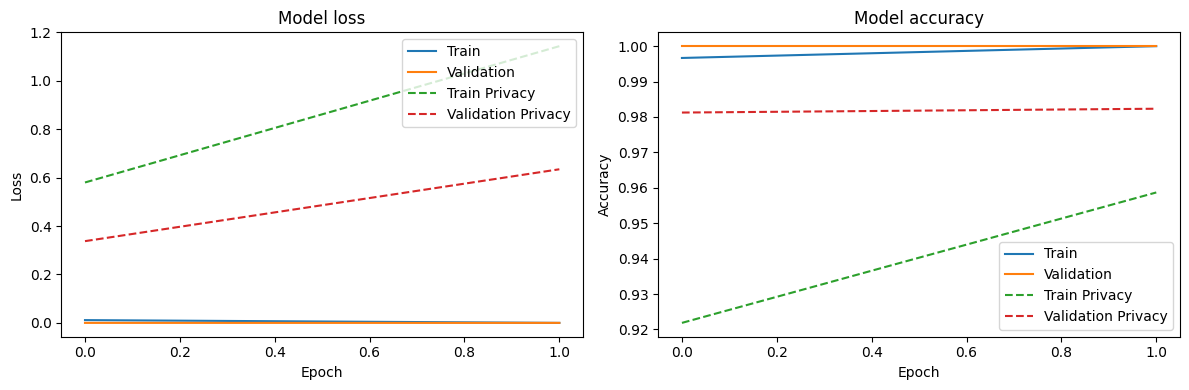

In [ ]:
plot_loss(model_history, model_history_privacy)

## Old Code

In [ ]:
# Separate majority and minority classes
# majority_class = data[data['is_attack'] == 0]
# minority_class = data[data['is_attack'] == 1]

# # Upsample minority class to match majority class
# minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

In [ ]:

# # Combine majority class with upsampled minority class
# data_balanced = pd.concat([majority_class, minority_upsampled])

# # Extract features and target from the balanced data
# target_column = 'is_attack'
# categorical_columns = [col for col in data.columns if col != target_column]
# X_balanced = data_balanced.drop(target_column, axis=1)
# y_balanced = data_balanced[target_column]

In [ ]:
# Split the balanced data into training, validation, and test sets
# X_train_balanced, X_temp_balanced, y_train_balanced, y_temp_balanced = train_test_split(
#     X_balanced, y_balanced, test_size=0.4, random_state=42, stratify=y_balanced
# )
# X_valid_balanced, X_test_balanced, y_valid_balanced, y_test_balanced = train_test_split(
#     X_temp_balanced, y_temp_balanced, test_size=0.4, random_state=42, stratify=y_temp_balanced
# )


In [ ]:
# Standard Scaling
# scaler = StandardScaler()
# X_train_scaled = X_train_balanced.copy()
# X_train_scaled[categorical_columns] = scaler.fit_transform(X_train_balanced[categorical_columns])
# X_valid_scaled = X_valid_balanced.copy()
# X_valid_scaled[categorical_columns] = scaler.transform(X_valid_balanced[categorical_columns])
# X_test_scaled = X_test_balanced.copy()
# X_test_scaled[categorical_columns] = scaler.transform(X_test_balanced[categorical_columns])

In [ ]:
# Reshape data for LSTM
# X_train_numpy = X_train_scaled[categorical_columns].to_numpy()
# X_train_lstm = X_train_numpy.reshape(X_train_numpy.shape[0], 1, X_train_numpy.shape[1])
# X_valid_array = X_valid_scaled[categorical_columns].to_numpy()
# X_valid_reshaped = X_valid_array.reshape(X_valid_array.shape[0], 1, X_valid_array.shape[1])
# X_test_array = X_test_scaled[categorical_columns].to_numpy()
# X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])

# # Define your privacy parameters where delta is representing change in a parameter during each iteration optimization
# epsilon = 0.0000001
# delta = 1e-8

In [ ]:
# Create your LSTM model
# model = Sequential()
# model.add(LSTM(8, input_shape=(1, len(categorical_columns))))  # Reduce the number of LSTM units
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model with the SGD optimizer
# learning_rate = 0.001
# sgd_optimizer = SGD(learning_rate=learning_rate)
# model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# epochs = 2
# batch_size = 256
# noise_scale_factor = 1.3  # Increase the scale of the noise

# for epoch in range(epochs):
#     for batch in range(0, len(X_train_lstm), batch_size):
#         X_batch = X_train_lstm[batch:batch+batch_size]
#         y_batch = y_train_balanced[batch:batch+batch_size]

#         y_batch = tf.convert_to_tensor(y_batch, dtype=tf.float32)
#         y_batch = tf.reshape(y_batch, (-1, 1))

#         with tf.GradientTape() as tape:
#             y_pred = model(X_batch, training=True)
#             loss = tf.keras.losses.binary_crossentropy(y_batch, y_pred)

#         gradients = tape.gradient(loss, model.trainable_variables)

#         for i in range(len(gradients)):
#             noise = np.random.normal(loc=0.0, scale=noise_scale_factor * epsilon)
#             gradients[i] += noise

#         sgd_optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# # Evaluate the model on the entire test set
# X_test_reshaped = X_test_scaled[categorical_columns].to_numpy().reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
# y_test_pred = model.predict(X_test_reshaped)

# # Apply the threshold to make binary predictions
# threshold = 0.3
# y_test_pred_binary = (y_test_pred > threshold).astype(int)

In [ ]:
# # Evaluation metrics
# accuracy = accuracy_score(y_test_balanced, y_test_pred_binary)
# precision = precision_score(y_test_balanced, y_test_pred_binary)
# recall = recall_score(y_test_balanced, y_test_pred_binary)
# f1 = f1_score(y_test_balanced, y_test_pred_binary)

# # Print the results
# print(f"Accuracy =  {accuracy * 100}")
# print(f"Precision = {precision * 100}")
# print(f"Recall = {recall * 100}")
# print(f"F1 Score =  {f1 * 100}")

**Confusion Matrix**

In [ ]:
# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

**precision recall curve.**

In [ ]:
# # Apply the threshold to make binary predictions
# threshold = 0.6
# y_test_pred_binary = (y_test_pred > threshold).astype(int)

# # Get precision and recall values
# precision, recall, _ = precision_recall_curve(y_test_balanced, y_test_pred_binary)

# # Calculate area under the precision-recall curve
# auc_score = auc(recall, precision)

# # Plot precision-recall curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label=f'AUC = {auc_score:.2f}')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.show()


In [ ]:
# # Assuming you have some data for privacy budgets and noise metrics
# privacy_budgets = [0.1, 0.01, 0.001, 0.0001]
# noise_metrics = [10, 5, 2, 1]

# # Plot privacy budget vs noise metric
# plt.figure(figsize=(8, 6))
# plt.plot(privacy_budgets, noise_metrics, marker='o')
# plt.xscale('log')  # Use a logarithmic scale for better visualization
# plt.xlabel('Privacy Budget (Epsilon)')
# plt.ylabel('Noise Metric')
# plt.title('Privacy Budget vs Noise Metric')
# plt.grid(True)
# plt.show()


In [ ]:
# # Plot privacy budget vs noise metric
# plt.figure(figsize=(8, 6))
# plt.plot(privacy_budgets, noise_metrics, marker='o')
# plt.xscale('log')  # Use a logarithmic scale for better visualization
# plt.xlabel('Privacy Budget (Epsilon)')
# plt.ylabel('Noise Metric')
# plt.title('Privacy Budget vs Noise Metric')
# plt.show()


In [ ]:

# privacy_budget_values = []
# momentum_values = []

# # Training loop with privacy budget and momentum tracking
# for epoch in range(epochs):
#     for batch in range(0, len(X_train_lstm), batch_size):
#         # ... (code for batching and training)

#         # Calculate privacy budget and momentum values and append to lists
#         privacy_budget_values.append(epsilon * (epoch * len(X_train_lstm) + batch_size) + delta)
#         momentum_values.append(learning_rate)

# ... (Rest of the code)

# # Plot privacy budget and momentum
# plt.figure(figsize=(12, 6))

# # Privacy Budget Plot
# plt.subplot(1, 2, 1)
# plt.plot(privacy_budget_values, label='Privacy Budget')
# plt.xlabel('Training Iterations')
# plt.ylabel('Privacy Budget')
# plt.title('Privacy Budget Over Training')
# plt.legend()



<!--  -->

<!--  -->

In [ ]:
# Momentum Plot
# plt.subplot(1, 2, 2)
# plt.plot(momentum_values, label='Momentum')
# plt.xlabel('Training Iterations')
# plt.ylabel('Momentum')
# plt.title('Momentum Over Training')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:


# # Initialize lists to store convergence behavior and training time
# training_loss_values = []
# training_time_values = []

# # Training loop with tracking convergence behavior and training time
# for epoch in range(epochs):
#     start_time = time.time()  # Record start time for training time calculation
#     for batch in range(0, len(X_train_lstm), batch_size):
#         # ... (code for batching and training)

#         # Calculate training loss for the current batch and append to the list
#         training_loss = model.evaluate(X_batch, y_batch, verbose=0)[0]
#         training_loss_values.append(training_loss)

#     end_time = time.time()  # Record end time for training time calculation
#     training_time_values.append(end_time - start_time)

# # Plot convergence behavior and training time
# plt.figure(figsize=(12, 6))

<!--  -->

In [ ]:
# # Convergence Behavior Plot
# plt.subplot(1, 2, 1)
# plt.plot(training_loss_values, label='Training Loss')
# plt.xlabel('Training Iterations')
# plt.ylabel('Training Loss')
# plt.title('Convergence Behavior Over Training')
# plt.legend()

In [ ]:
# # Training Time Plot# too few epoch equal underfitting too many epoch overfitting may occur# recommended epoch is 3x number of columns
# plt.subplot(1, 2, 2)
# plt.plot(training_time_values, label='Training Time')
# plt.xlabel('Epochs')
# plt.ylabel('Training Time (seconds)')
# plt.title('Training Time Over Epochs')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:
# from tensorflow.keras.utils import plot_model
# # Plot the model graph and save it as an image
# plot_model(model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)